
---------------------------------------------


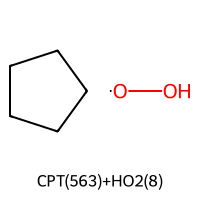

Direct products:


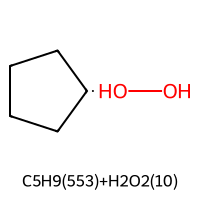

alt.Chart(...)

alt.LayerChart(...)

In [3]:
from pathlib import Path

import automech as am
import polars as pl
from project_utilities import p_

T_range = (300, 1200)
open_browser = False
tag = "Z_mess_v0"
root_path = Path("..")

stoich = "C5H7"
reactants_list = [["C5H7(500)"], ["C5H7(504)"]]
stoich = "C5H7O2"
reactants_list = [["S(602)"], ["S(1206)r0"], ["S(1210)r0"], ["S(1209)r0"]]
stoich = "C5H9"
reactants_list = [["C5H9(553)"]]
stoich = "C5H9O"
reactants_list = [["C5H8(522)", "OH(4)"], ["C5H9O(852)r0"]]
stoich = "C5H9O2"
reactants_list = [["S(719)"], ["S(722)r0"], ["S(725)r0"], ["C5H8(522)", "HO2(8)"]]
stoich = "C5H11O"
reactants_list = [["CPT(563)", "OH(4)"]]
stoich = "C5H11O2"
reactants_list = [["CPT(563)", "HO2(8)"]]

calc_mech_json = p_.calculated_pes_mechanism(
    tag, stoich, "json", path=p_.data(root_path)
)
calc_mech = am.io.read(calc_mech_json)

if open_browser:
    disp_mech = calc_mech.model_copy(deep=True)
    disp_mech.reactions = disp_mech.reactions.filter(~pl.col("well_skipping"))
    am.display(disp_mech)

am.display_branching_fractions(
    calc_mech, T_range=T_range, P=1., reactants_list=reactants_list
)